# Anime Recomendation using cluster
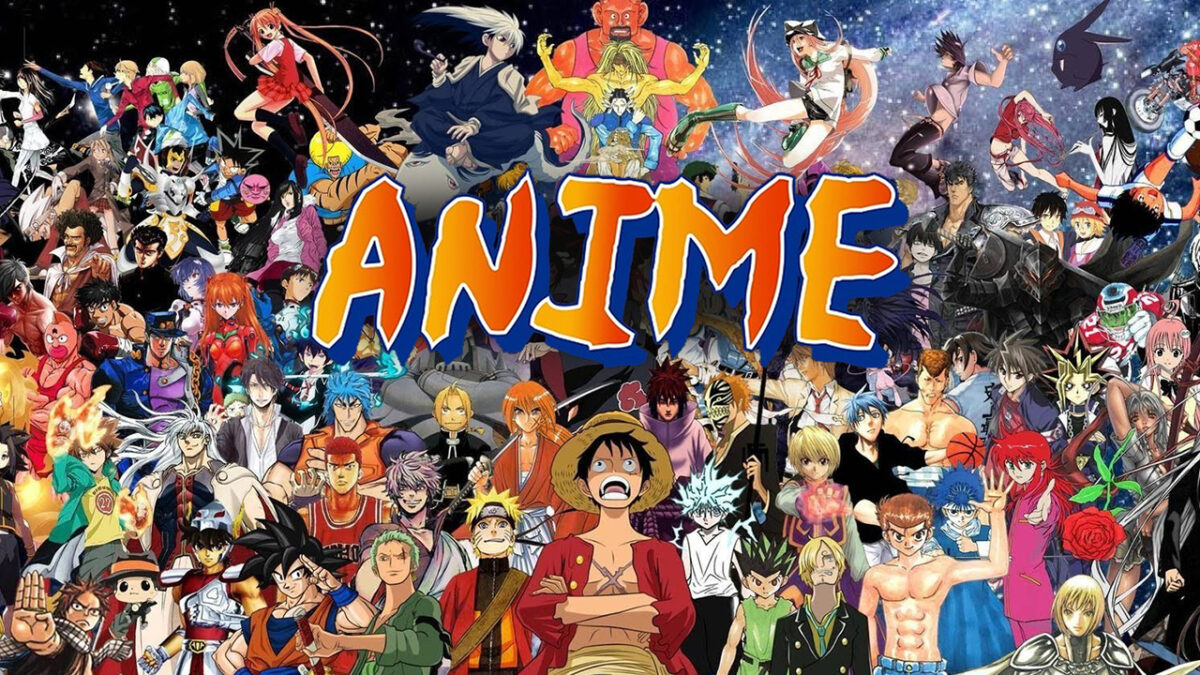


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

## Data preparation


In [2]:
rating = pd.read_csv('rating.csv')
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [3]:
anime0 = pd.read_csv('anime.csv')
anime0.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


Next we will extract a feature vector for each anime


In [4]:
anime = anime0.drop(columns=['name', 'members', 'rating'])

In [5]:
# expand genre in columns, one for each genre
def func(x):
    if x['genre'] is np.nan:
        return x
    else:
        genres = list(map(lambda y: y.strip(), x['genre'].split(',')))
        for g in genres:
            x[g] = 1
        return x


anime2 = anime.apply(func, axis=1)
anime2.head()

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,anime_id,episodes,genre,type
0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,32281,1,"Drama, Romance, School, Supernatural",Movie
1,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5114,64,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV
2,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,28977,51,"Action, Comedy, Historical, Parody, Samurai, S...",TV
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,9253,24,"Sci-Fi, Thriller",TV
4,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9969,51,"Action, Comedy, Historical, Parody, Samurai, S...",TV


In [6]:
# expand type in columns, one for each type
one_hot = pd.get_dummies(anime2['type'])
one_hot[one_hot == 0] = np.nan
anime3 = (anime2
          .drop(columns=['type', 'episodes', 'genre'])
          .join(one_hot, rsuffix='-type'))
anime3.head()

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Vampire,Yaoi,Yuri,anime_id,Movie,Music-type,ONA,OVA,Special,TV
0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,32281,True,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,5114,NaN,NaN,NaN,NaN,NaN,True
2,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,28977,NaN,NaN,NaN,NaN,NaN,True
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9253,NaN,NaN,NaN,NaN,NaN,True
4,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9969,NaN,NaN,NaN,NaN,NaN,True


Now we can merge each anime features in the rating table


In [7]:
rating_anime = rating.join(anime3.set_index('anime_id'), on='anime_id')
rating_anime.head()

,user_id,anime_id,rating,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,...,Thriller,Vampire,Yaoi,Yuri,Movie,Music-type,ONA,OVA,Special,TV
0,1,20,-1,1.0,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,1,24,-1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,1,79,-1,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,1,226,-1,1.0,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,1,241,-1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


-1 rating indicates that the user has not rated but watched the anime. We will assign rating of 5 for such cases.


In [8]:
rating_anime.loc[rating_anime['rating'] == -1, 'rating'] = 5
rating_anime.head()

,user_id,anime_id,rating,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,...,Thriller,Vampire,Yaoi,Yuri,Movie,Music-type,ONA,OVA,Special,TV
0,1,20,5,1.0,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,1,24,5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,1,79,5,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,1,226,5,1.0,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,1,241,5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


Next, the rating becomes a weight in the anime properties

In [9]:
# anime3 is the joined dataframe before.
#columns are anime properties, except anime_id.
attr = anime3.columns.tolist()
attr.remove('anime_id')

rating_anime[attr] = rating_anime[attr].mul(rating_anime['rating'], axis=0)
rating_anime.head(10)

,user_id,anime_id,rating,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,...,Thriller,Vampire,Yaoi,Yuri,Movie,Music-type,ONA,OVA,Special,TV
0,1,20,5,5.0,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
1,1,24,5,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
2,1,79,5,NaN,NaN,NaN,5.0,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3,1,226,5,5.0,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
4,1,241,5,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
5,1,355,5,5.0,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
6,1,356,5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
7,1,442,5,NaN,5.0,NaN,5.0,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN
8,1,487,5,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
9,1,846,5,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


Now we can calculate user preference as the mean values for its gradings in each category


In [10]:
users = (rating_anime
         .drop(columns=['anime_id', 'rating'])
         .groupby(by='user_id')
         .mean())
users.head()

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Thriller,Vampire,Yaoi,Yuri,Movie,Music-type,ONA,OVA,Special,TV
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.200000,5.333333,NaN,5.103093,NaN,5.714286,5.000000,5.230769,5.108696,5.833333,...,NaN,5.0,NaN,NaN,5.0,NaN,NaN,5.0,5.0,5.172414
2,NaN,NaN,NaN,7.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.666667
3,7.218750,7.479167,NaN,7.589744,NaN,6.500000,7.451613,7.800000,7.576923,7.000000,...,8.000000,6.0,NaN,NaN,7.142857,NaN,NaN,7.0,7.666667,7.623188
4,5.000000,5.000000,NaN,5.000000,NaN,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0
5,4.707006,5.182796,6.0,4.168712,1.0,4.200000,5.217949,2.510000,4.416667,4.100000,...,7.285714,4.5,NaN,NaN,5.846154,NaN,2.6,4.241935,4.055556,4.273846


The nan values in dataframe refers to categories that the user has never watched an anime in. So, its a good hypotesis to assign a 0 grade to then


In [11]:
users = users.fillna(value=0)
users.head()

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Thriller,Vampire,Yaoi,Yuri,Movie,Music-type,ONA,OVA,Special,TV
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.200000,5.333333,0.0,5.103093,0.0,5.714286,5.000000,5.230769,5.108696,5.833333,...,0.000000,5.0,0.0,0.0,5.000000,0.0,0.0,5.000000,5.000000,5.172414
2,0.000000,0.000000,0.0,7.500000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,6.666667
3,7.218750,7.479167,0.0,7.589744,0.0,6.500000,7.451613,7.800000,7.576923,7.000000,...,8.000000,6.0,0.0,0.0,7.142857,0.0,0.0,7.000000,7.666667,7.623188
4,5.000000,5.000000,0.0,5.000000,0.0,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.0,0.0,0.0,5.000000,0.0,0.0,0.000000,0.000000,5.000000
5,4.707006,5.182796,6.0,4.168712,1.0,4.200000,5.217949,2.510000,4.416667,4.100000,...,7.285714,4.5,0.0,0.0,5.846154,0.0,2.6,4.241935,4.055556,4.273846


Lets evaluate how to reduce dimensionality before applying kmeans


Text(0, 0.5, 'Variance Explained')

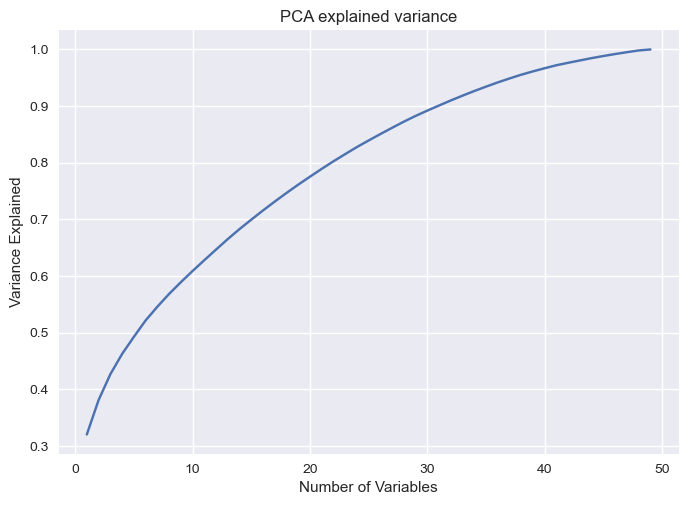

In [17]:
%matplotlib inline

pca = PCA()
pca.fit(users)
acc_var = np.cumsum(pca.explained_variance_ratio_) 

plt.style.use('seaborn')
plt.plot(range(1, len(acc_var)+1), acc_var)
plt.title('PCA explained variance')
plt.xlabel('Number of Variables')
plt.ylabel('Variance Explained')

Based on the plot above, we choose the number of variables. About 80% of variance explained seems good. 

In [13]:
number_of_components = 20
pca.set_params(n_components=number_of_components)
pca.fit(users)
users_pca = pca.transform(users)
users_pos_pca = pd.DataFrame(users_pca)
users_pos_pca['user_id'] = users.index
users_pos_pca = users_pos_pca.set_index('user_id')
users_pos_pca.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
user_id,,,,,,,,,,,,,,,,,,,,
1,7.925522,-2.410398,-2.713537,3.374157,-0.402169,-5.834232,-2.410108,-0.389698,-0.222885,-4.749362,-2.315476,-2.219227,-1.450774,-0.983844,0.100416,1.511194,-0.667068,-1.613723,2.140681,-1.971656


## K-means clustering

Text(0.5, 1.0, 'K-means error vs number of Clusters')

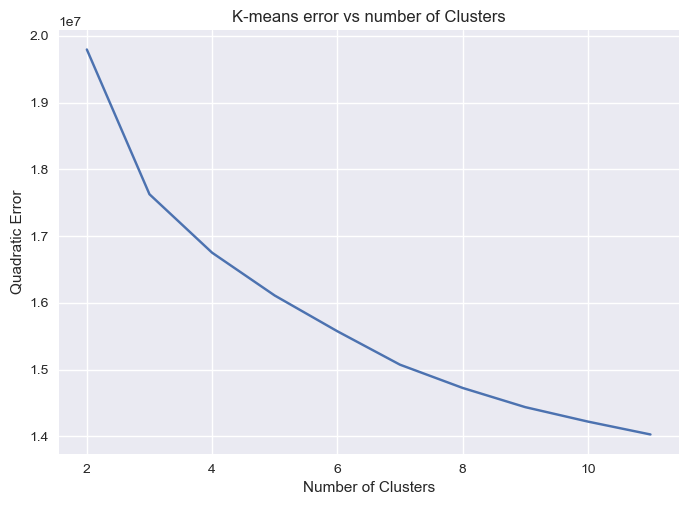

In [16]:
inertia = []
scores = []
for n_clusters in range(2, 12):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(users_pos_pca)
    inertia.append(kmeans.inertia_)
plt.plot(range(2, 12), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Quadratic Error')
plt.title('K-means error vs number of Clusters')

 We chose 6 as optimum number of clusters.


In [22]:
users_with_label = pd.DataFrame(PCA(n_components=3).fit_transform(users))
users_with_label['user_id'] = users.index
users_with_label = users_with_label.set_index('user_id')

#find each user's cluster
kmeans = KMeans(n_clusters=6, n_init=30)
users_with_label['label'] = kmeans.fit_predict(users_pos_pca)
users_with_label.head()

,0,1,2,label
user_id,,,,
1,7.925522,-2.410452,-2.716984,2
2,27.318071,-8.940106,-1.310518,1
3,-5.447081,4.407124,2.631719,3
4,9.340778,0.184749,1.601837,2
5,5.142252,-10.747787,2.647821,2


## Creating recomendations

To evaluate which is a good anime chosen by the group. The two important factors are average rating and views. 




#### Joining the rating table with the User's Cluster.


In [23]:
rating_user = rating.join(users_with_label[['label']], on='user_id')
rating_user.loc[rating_user['rating'] == -1, 'rating'] = np.nan
rating_user.head(1)

,user_id,anime_id,rating,label
0,1,20,NaN,2


#### Grouping data and finding aggregated values like mean and count

In [24]:
groups = (rating_user[['anime_id', 'rating', 'label']]
          .groupby(by=['label', 'anime_id'])
          .rating.agg(['mean', 'count']))
groups.head(2)

mean  count
label anime_id                 
0     1         8.882318   8319
      5         8.511411   4075

#### 'obj' here is  goodness evaluation


In [25]:
groups['obj'] = groups['mean']*groups['count']
groups.head()

mean  count      obj
label anime_id                          
0     1         8.882318   8319  73892.0
      5         8.511411   4075  34684.0
      6         8.441032   6088  51389.0
      7         7.578408   1658  12565.0
      8         7.224066    241   1741.0

#### dropping null values


In [26]:
groups_obj = groups[['obj']].dropna()
groups_obj.head(2)

obj
label anime_id         
0     1         73892.0
      5         34684.0

In [27]:

cats = groups_obj.index.get_level_values(0).unique().tolist()
rec = []
for cat in cats:
    rec.append(
        groups_obj
        .loc[cat]
        .sort_values(by='obj', ascending=False)
        .reset_index()
        .join(
            anime0[['name', 'anime_id']].set_index('anime_id'),
            on='anime_id')
        ['name']
        .rename(cat)
    )
rec = pd.concat(rec, axis=1)
rec.head(10)

,0,1,2,3,4,5
0,Death Note,Naruto,Death Note,Death Note,Ouran Koukou Host Club,Death Note
1,Code Geass: Hangyaku no Lelouch,Death Note,Code Geass: Hangyaku no Lelouch,Sword Art Online,Sword Art Online,Shingeki no Kyojin
2,Code Geass: Hangyaku no Lelouch R2,Sword Art Online,Angel Beats!,Shingeki no Kyojin,Naruto,Sword Art Online
3,Fullmetal Alchemist: Brotherhood,Shingeki no Kyojin,Fullmetal Alchemist: Brotherhood,Code Geass: Hangyaku no Lelouch,Angel Beats!,Fullmetal Alchemist: Brotherhood
4,Toradora!,Ouran Koukou Host Club,Sen to Chihiro no Kamikakushi,Angel Beats!,Shingeki no Kyojin,Naruto
5,Angel Beats!,Angel Beats!,Shingeki no Kyojin,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist,Elfen Lied
6,Shingeki no Kyojin,Dragon Ball Z,Code Geass: Hangyaku no Lelouch R2,Elfen Lied,Toradora!,Code Geass: Hangyaku no Lelouch
7,Elfen Lied,Sen to Chihiro no Kamikakushi,Tengen Toppa Gurren Lagann,Code Geass: Hangyaku no Lelouch R2,Sen to Chihiro no Kamikakushi,Mirai Nikki (TV)
8,Fullmetal Alchemist,Vampire Knight,Neon Genesis Evangelion,Naruto,Clannad,Fullmetal Alchemist
9,Sword Art Online,Clannad,Fullmetal Alchemist,Mirai Nikki (TV),Fullmetal Alchemist: Brotherhood,Angel Beats!


In [29]:
for i in range(3, 20, 2):
    print('First {} recomendations: {} animes in total'
          .format(
              i,
              np.unique(
                  rec
                  .head(i)
                  .to_numpy())
              .shape[0]))


First 3 recomendations: 8 animes in total
First 5 recomendations: 11 animes in total
First 7 recomendations: 14 animes in total
First 9 recomendations: 19 animes in total
First 11 recomendations: 21 animes in total
First 13 recomendations: 27 animes in total
First 15 recomendations: 32 animes in total
First 17 recomendations: 33 animes in total
First 19 recomendations: 36 animes in total


Good variability can be seen, hence this recomendation system is valid
